In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style = 'white')

In [2]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Test Re-test 

In [30]:
df_test_ss = pd.read_csv('Test Social Support.csv')
df_retest_ss = pd.read_csv('Retest Social Support.csv')
df_test_pwb = pd.read_csv('Test PWB.csv')
df_retest_pwb = pd.read_csv('ReTest PWB.csv')

In [31]:
X_t_ss = df_test_ss['Total']
X_rt_ss = df_retest_ss['Total']
X_t_pwb = df_test_pwb['Total']
X_rt_pwb = df_retest_pwb['Total']

model = LinearRegression()

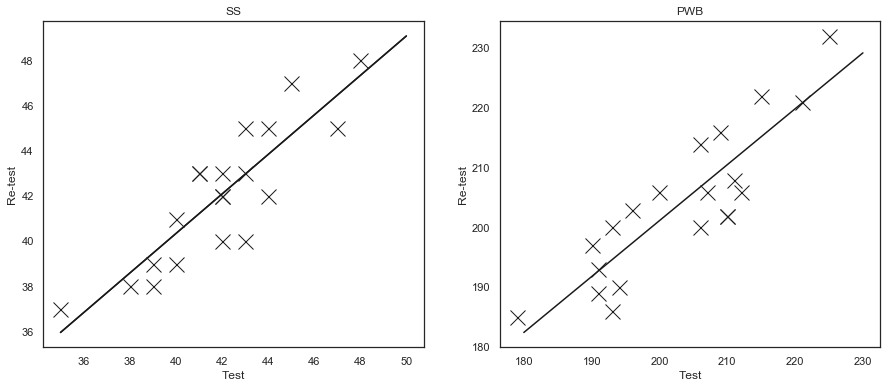

In [52]:
plt.figure(figsize= (15, 6))

plt.subplot(1, 2, 1)
model.fit(X_t_ss[:, np.newaxis], X_rt_ss)

x_fit = np.linspace(35, 50)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(X_t_ss, X_rt_ss, 'kx', markersize = 15)
plt.plot(x_fit, y_fit, 'k')
plt.plot(x_fit, y_fit, 'k')
plt.xlabel('Test')
plt.ylabel('Re-test')
plt.title('SS')

plt.subplot(1, 2, 2)
model.fit(X_t_pwb[:, np.newaxis], X_rt_pwb)

x_fit = np.linspace(180, 230)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(X_t_pwb, X_rt_pwb, 'kx', markersize = 15)
plt.plot(x_fit, y_fit, 'k')
plt.xlabel('Test')
plt.ylabel('Re-test')
plt.title('PWB')

plt.show()

# Main survey

In [3]:
ss_lb = pd.read_csv('SS.Left-behind.csv')
ss_nlb = pd.read_csv('SS.Non-Left-behind.csv')
pwb_lb = pd.read_csv('PWB.Left-behind_1.csv')
pwb_nlb = pd.read_csv('PWB.Non-left-behind.csv')

In [4]:
ss_lb['FamilyType'].head()

0    1
1    1
2    1
3    2
4    2
Name: FamilyType, dtype: int64

In [6]:
df_comb = pd.DataFrame()

df_comb['ss_lb'] = ss_lb.iloc[:, -1]
df_comb['ss_nlb'] = ss_nlb.iloc[:, -1]
df_comb['pwb_lb'] = pwb_lb.iloc[:, -1]
df_comb['pwb_nlb'] = pwb_nlb.iloc[:, -43: -1].sum(axis = 1)

df_comb.head()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
0,42,47,211,210
1,40,42,207,193
2,40,43,206,210
3,39,42,191,190
4,41,41,209,212


# Distribution 

Make subplot

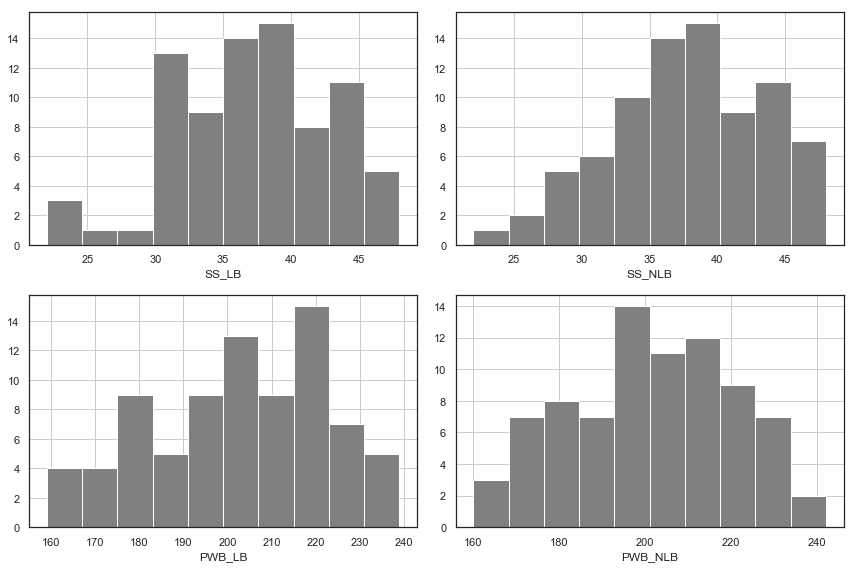

In [115]:
plt.figure(figsize= (12, 8))
plt.subplot(2, 2, 1)
df_comb['ss_lb'].hist(bins = 10, color = 'gray')
plt.xlabel('SS_LB')

plt.subplot(2,2,2)
df_comb['ss_nlb'].hist(bins = 10, color = 'gray')
plt.xlabel('SS_NLB')

plt.subplot(2,2,3)
df_comb['pwb_lb'].hist(bins = 10, color = 'gray')
plt.xlabel('PWB_LB')

plt.subplot(2,2,4)
df_comb['pwb_nlb'].hist(bins = 10, color = 'gray')
plt.xlabel('PWB_NLB')

plt.tight_layout()
plt.show()

# Summary Statistics

Make a box plot 

In [8]:
df_comb.describe()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
count,80.000000,80.000000,80.000000,80.000000
mean,37.225000,37.700000,202.200000,201.337500
std,5.854729,5.803534,20.199887,19.251792
min,22.000000,22.000000,159.000000,160.000000
25%,33.000000,34.000000,186.250000,190.000000
50%,37.000000,38.000000,205.000000,201.000000
75%,42.000000,42.000000,218.250000,215.000000
max,48.000000,48.000000,239.000000,242.000000


In [107]:
df_new_1 = pd.DataFrame()
df_new_2 = pd.DataFrame()

df_new_1['ss'] = df_comb['ss_lb']
df_new_1['pwb'] = df_comb['pwb_lb']
df_new_1['lb'] = 1

df_new_2['ss'] = df_comb['ss_nlb']
df_new_2['pwb'] = df_comb['pwb_nlb']
df_new_2['lb'] = 0

df_new = df_new_1.append(df_new_2)

In [108]:
df_new.head()

,ss,pwb,lb
0,42,211,1
1,40,207,1
2,40,206,1
3,39,191,1
4,41,209,1


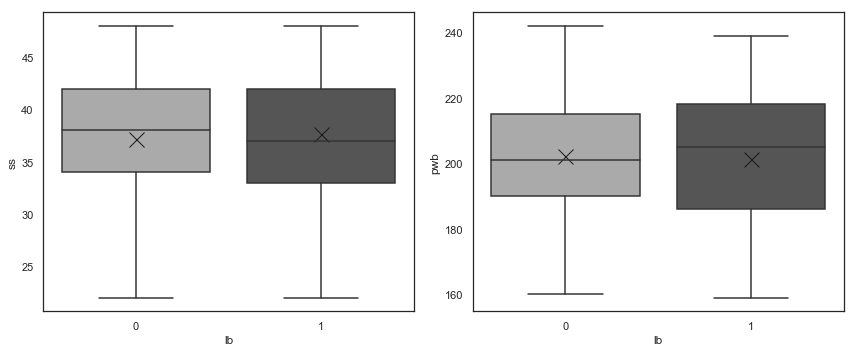

In [112]:
plt.figure(figsize= (12, 5))

plt.subplot(121)
sns.boxplot('lb', 'ss', data = df_new, palette=  'binary')
plt.plot(0, df_comb['ss_lb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb['ss_nlb'].mean(), 'kx', markersize = 15)

plt.subplot(122)
sns.boxplot('lb', 'pwb', data = df_new, palette=  'binary')
plt.plot(0, df_comb['pwb_lb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb['pwb_nlb'].mean(), 'kx', markersize = 15)

plt.tight_layout()
plt.show()

# Correlation 

Find pearson correlation and its p-value

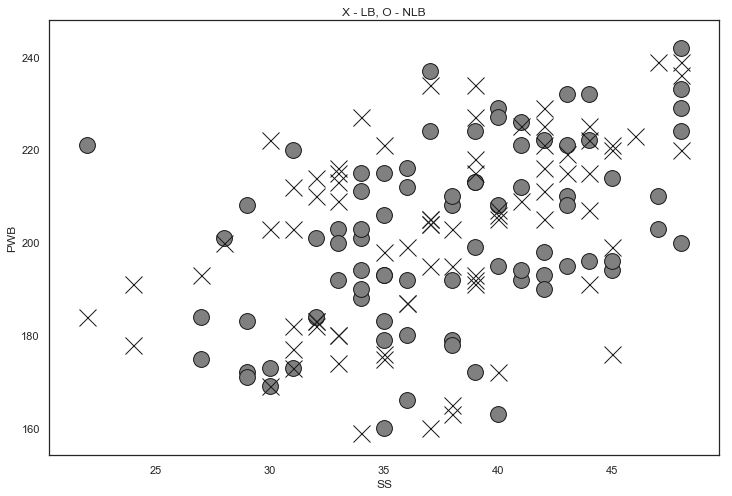

In [10]:
plt.figure(figsize= (12, 8))
plt.plot(df_comb['ss_lb'], df_comb['pwb_lb'], 'kx', markersize = 17)
#plt.plot(df_comb['ss_nlb'], df_comb['pwb_nlb'], 'k*', markersize = 10)
plt.scatter(df_comb['ss_nlb'], df_comb['pwb_nlb'], s = 250, facecolors='gray', edgecolors='k')
plt.xlabel('SS')
plt.ylabel('PWB')
plt.title('X - LB, O - NLB')
plt.show()

In [11]:
pearsonr(df_comb['ss_lb'], df_comb['pwb_lb'])

(0.4768742693823513, 7.749811960732086e-06)

In [12]:
pearsonr(df_comb['ss_nlb'], df_comb['pwb_nlb'])

(0.43483597599401624, 5.5647622931268286e-05)

In [13]:
pearsonr(df_comb['ss_lb'].append(df_comb['ss_nlb']), df_comb['pwb_lb'].append(df_comb['pwb_nlb']))

(0.4549703748156383, 1.5023170330909118e-09)

# t-Test 

In [14]:
mean_ss_lb = df_comb['ss_lb'].mean()
mean_ss_nlb = df_comb['ss_nlb'].mean()
mean_pwb_lb = df_comb['pwb_lb'].mean()
mean_pwb_nlb = df_comb['pwb_nlb'].mean()

In [15]:
std_ss_lb = df_comb['ss_lb'].std()
std_ss_nlb = df_comb['ss_nlb'].std()
std_pwb_lb = df_comb['pwb_lb'].std()
std_pwb_nlb = df_comb['pwb_nlb'].std()

In [16]:
mean_diff_ss = mean_ss_lb - mean_ss_nlb
mean_diff_pwb = mean_pwb_lb - mean_pwb_nlb

In [17]:
n = len(df_comb)

se_ss = np.sqrt(std_ss_lb ** 2 /n + std_ss_nlb ** 2 /n )
se_pwb = np.sqrt(std_pwb_lb ** 2 /n + std_pwb_nlb ** 2 /n )

In [18]:
mean_diff_ss/se_ss

-0.5153657561683429

In [19]:
mean_diff_pwb/se_pwb

0.27645740798676

# Family type 

In [20]:
df_comb['Family_type_lb'] = ss_lb['FamilyType']
df_comb['Family_type_nlb'] = ss_nlb['FamilyType']

df_comb.head()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb,Family_type_lb,Family_type_nlb
0,42,47,211,210,1,1
1,40,42,207,193,1,2
2,40,43,206,210,1,1
3,39,42,191,190,2,2
4,41,41,209,212,2,1


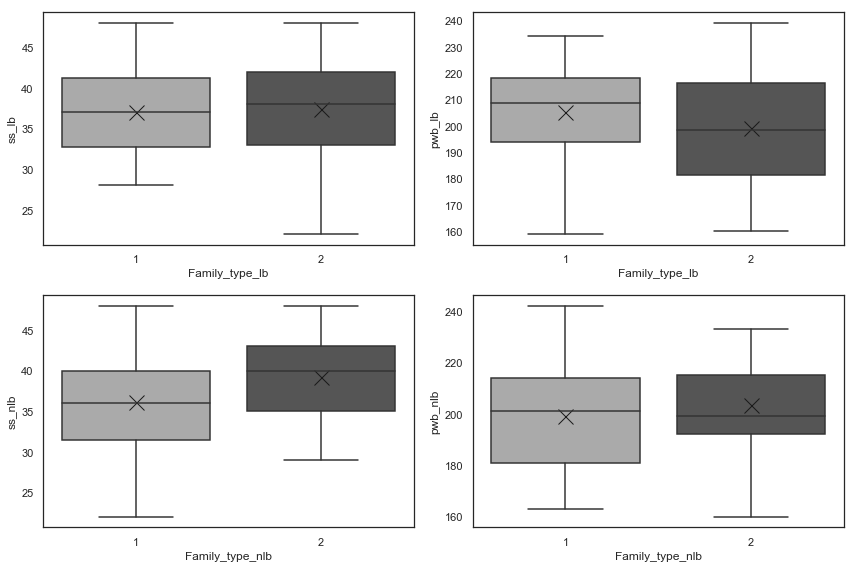

In [95]:
plt.figure(figsize= (12, 8))
plt.subplot(221)
sns.boxplot('Family_type_lb', 'ss_lb', data = df_comb, palette=  'binary')
plt.plot(0, df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].mean(), 'kx', markersize = 15)

plt.subplot(222)
sns.boxplot('Family_type_lb', 'pwb_lb', data = df_comb, palette=  'binary')
plt.plot(0, df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].mean(), 'kx', markersize = 15)

plt.subplot(223)
sns.boxplot('Family_type_nlb', 'ss_nlb', data = df_comb, palette=  'binary')
plt.plot(0, df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].mean(), 'kx', markersize = 15)

plt.subplot(224)
sns.boxplot('Family_type_nlb', 'pwb_nlb', data = df_comb, palette= 'binary')
plt.plot(0, df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].mean(), 'kx', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].mean(), 'kx', markersize = 15)

plt.tight_layout()
plt.show()

# t - Test by Family type

In [116]:
mean_ss_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].mean()
mean_ss_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].mean()
mean_ss_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].mean()
mean_ss_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].mean()

mean_pwb_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].mean()
mean_pwb_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].mean()
mean_pwb_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].mean()
mean_pwb_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].mean()

In [117]:
std_ss_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].std()
std_ss_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].std()
std_ss_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].std()
std_ss_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].std()

std_pwb_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].std()
std_pwb_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].std()
std_pwb_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].std()
std_pwb_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].std()

In [118]:
mean_ss_diff_lb = mean_ss_lb_1 - mean_ss_lb_2
mean_ss_diff_nlb = mean_ss_nlb_1 - mean_ss_nlb_2

mean_pwb_diff_lb = mean_pwb_lb_1 - mean_pwb_lb_2
mean_pwb_diff_nlb = mean_pwb_nlb_1 - mean_pwb_nlb_2

In [126]:
n_lb_1 = sum(df_comb['Family_type_lb'] == 1)
n_nlb_1 = sum(df_comb['Family_type_nlb'] == 1)

n_lb_2 = 80 - n_lb_1
n_nlb_2 = 80 - n_nlb_1

In [128]:
se_ss_lb = np.sqrt(std_ss_lb_1 ** 2 /n_lb_1 + std_ss_lb_2 ** 2 /n_lb_2)
se_ss_nlb = np.sqrt(std_ss_nlb_1 ** 2 /n_nlb_1 + std_ss_nlb_2 ** 2 /n_nlb_2)

se_pwb_lb = np.sqrt(std_pwb_lb_1 ** 2 /n_lb_1 + std_pwb_nlb ** 2 /n_lb_2 )
se_pwb_nlb = np.sqrt(std_pwb_nlb_1 ** 2 /n_lb_1 + std_pwb_nlb ** 2 /n_nlb_2 )

In [130]:
mean_ss_diff_lb/se_ss_lb

-0.22777582122023543

In [131]:
mean_ss_diff_nlb/se_ss_nlb

-2.4210659791426195

In [132]:
mean_pwb_diff_lb/se_pwb_lb

1.3584992878215727

In [133]:
mean_pwb_diff_nlb/se_pwb_nlb

-0.8956799798066396